In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Generate graphs in SVG format
%config InlineBackend.figure_format = 'svg'

In [2]:
speeches = pd.read_csv('data/presidential_speeches_cleaned.csv', encoding='utf-8')
speeches['Party'].value_counts()

Democratic    489
Republican    389
Name: Party, dtype: int64

In [3]:
speeches.groupby('Party')['President'].value_counts()

Party       President            
Democratic  Lyndon B. Johnson        71
            Barack Obama             50
            Franklin D. Roosevelt    49
            John F. Kennedy          44
            Bill Clinton             39
            Woodrow Wilson           33
            Andrew Johnson           31
            Grover Cleveland         30
            Andrew Jackson           26
            James K. Polk            25
            Jimmy Carter             22
            Harry S. Truman          19
            Franklin Pierce          15
            James Buchanan           14
            Joe Biden                11
            Martin Van Buren         10
Republican  Ronald Reagan            59
            George W. Bush           39
            Ulysses S. Grant         32
            Herbert Hoover           30
            Benjamin Harrison        23
            George H. W. Bush        23
            Richard M. Nixon         23
            Theodore Roosevelt       22
      

In [4]:
colors = {
    'Democratic': '#1375b7',
    'Republican': '#f83036'
}

(This recipe-like writing is called *chaining* and is inspired by [Matt Harrison](https://twitter.com/__mharrison__).)

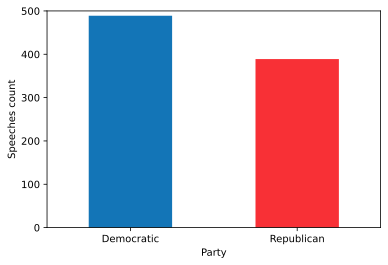

In [5]:
(speeches['Party']
    .value_counts()
    .plot(
        kind='bar',
        color=colors.values(),
        rot=0,
        xlabel='Party',
        ylabel='Speeches count',
        ylim=(0, 500),
    )
);

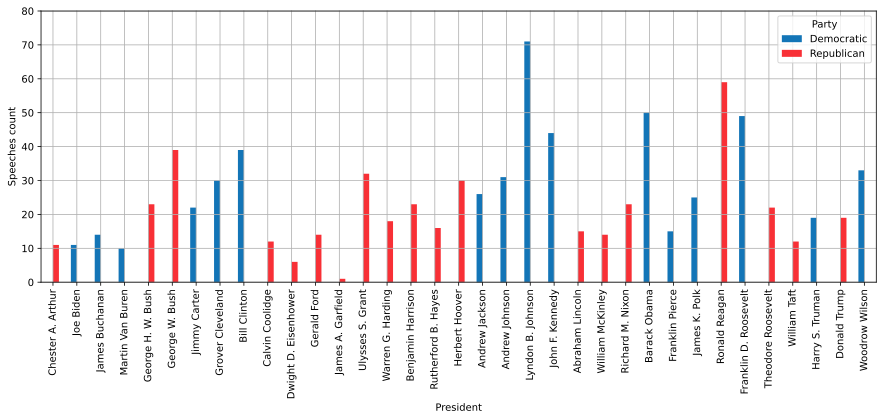

In [6]:
(speeches
    .groupby(['President', 'Party'])
    ['President'].size() # Count the number of speeches per president and party
    .unstack() # unstack multi-index to get a df with columns for each party
    .sort_index(key=lambda col: col.map(lambda x: x.split()[-1])) # Sort by last name
    .plot(
        kind='bar',
        color=colors.values(),
        figsize=(15, 5),
        ylim=(0, 80),
        xlabel='President',
        ylabel='Speeches count',
        grid=True,
        legend=True
    )
);

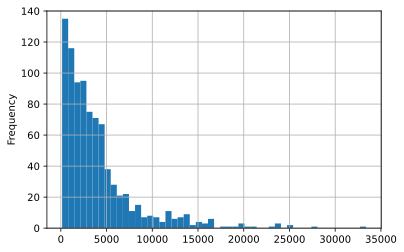

In [7]:
speeches['length'] = speeches['Transcript'].apply(lambda x: len(x.split()))

(speeches['length']
    .plot(
        kind='hist',
        bins=50,
        ylim=(0, 140),
        xlabel='Total words',
        ylabel='Speeches count',
        grid=True
    )
);